# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [7]:
import numpy as np
import math
from scipy.stats import rv_discrete

def task_1(n):
    x = np.arange(1, 2*n + 1)
    probs = np.log(x)
    k = 1 / math.log(math.factorial(2*n))
    probs *= k
    lognew = rv_discrete(name='lognew', values=(x, probs))
    return lognew




### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

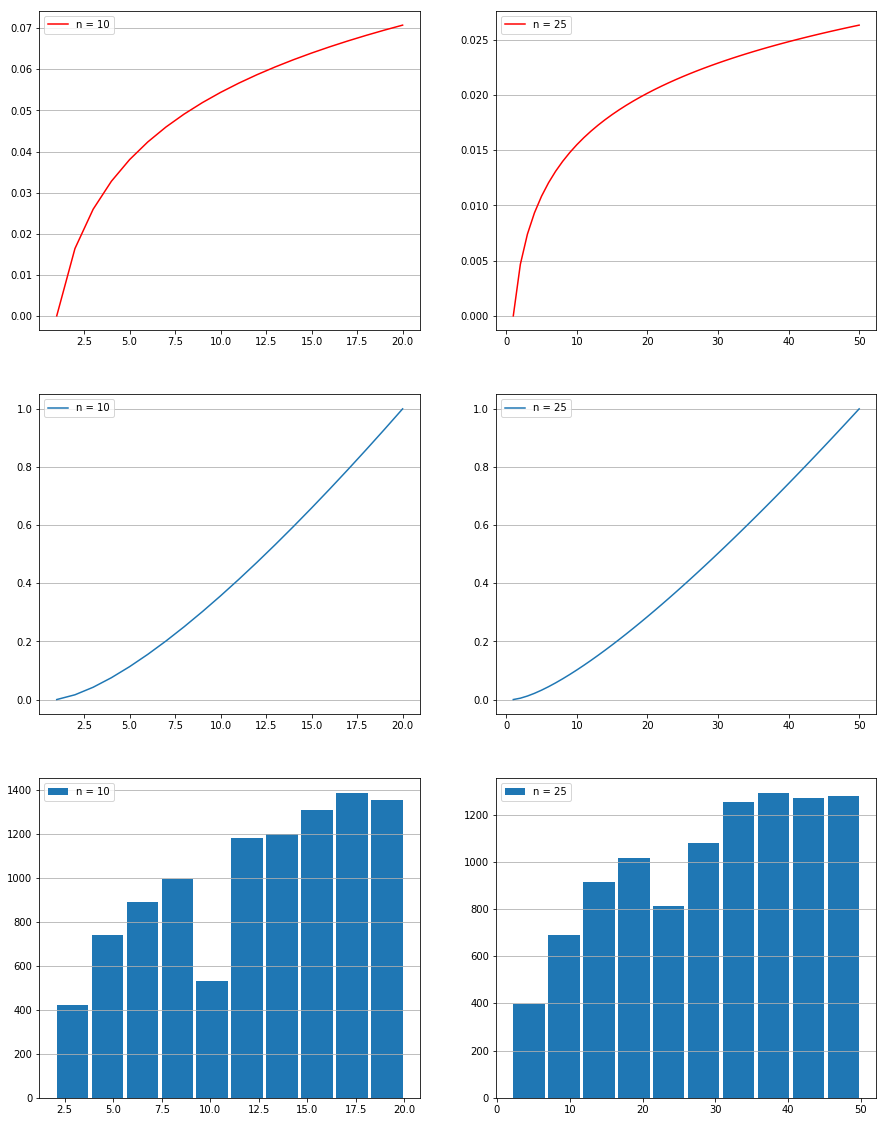

In [16]:
import matplotlib.pyplot as plt

def task_2(N):
    f, axes = plt.subplots(3,len(N),figsize = (15,20))
    for i,n in enumerate(N):
        x = np.arange(1,2*n+1)
        rnd = task_1(n)
        axes[0,i].plot(x,rnd.pmf(x), 'r', label = 'n = {}'.format(n))
        axes[1,i].plot(x,rnd.cdf(x), label = 'n = {}'.format(n))
        axes[2,i].hist(rnd.rvs(size = 10000), label = 'n = {}'.format(n), rwidth = 0.9)
        for j in range(3):
            axes[j,i].grid(axis = 'y')
            axes[j,i].legend(loc = 2)
    plt.show()
    
task_2((10,25))
    


### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [21]:
def task_3(N):
    for n in N:
        rnd = task_1(n)
        pair = np.arange(2,2*n+1,2)
        not_pair = np.arange(1,2*n+1,2)
        print('n = ', n)
        print('Prob of pair number = {}'.format(sum(rnd.pmf(pair))))
        print('Prob of not pair number = {} \n'.format(sum(rnd.pmf(not_pair))))

task_3((10,25))


n =  10
Prob of pair number = 0.5205046299279227
Prob of not pair number = 0.47949537007207715 

n =  25
Prob of pair number = 0.5073640739858903
Prob of not pair number = 0.4926359260141097 



### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [22]:
from collections import Counter as c
def task_4(N):
    for n in N:
        rnd = task_1(n)
        pair = np.arange(2,2*n+1,2)
        not_pair = np.arange(1,2*n+1,2)
        
        counter = c(rnd.rvs(size = 1000000))
        num_pair = sum([counter[i] for i in pair])
        num_not_pair = sum(counter.values()) - num_pair
        print('n = ', n)
        print('Prob of pair number = {}'.format(num_pair/1000000))
        print('Prob of not pair number = {} \n'.format(num_not_pair/1000000))
        
task_4((10,25))

n =  10
Prob of pair number = 0.520665
Prob of not pair number = 0.479335 

n =  25
Prob of pair number = 0.507654
Prob of not pair number = 0.492346 

